#Линейная регрессия

## Что такое регрессия

**Регрессия** — это способ предсказывать численную величину, связанную с исследуемыми объектами, по другим известным численным свойствам этих объектов.

**Признаки** (фичи, features) — исходные данные.

**Целевая переменная** (таргет, target) — то, что предсказываем.

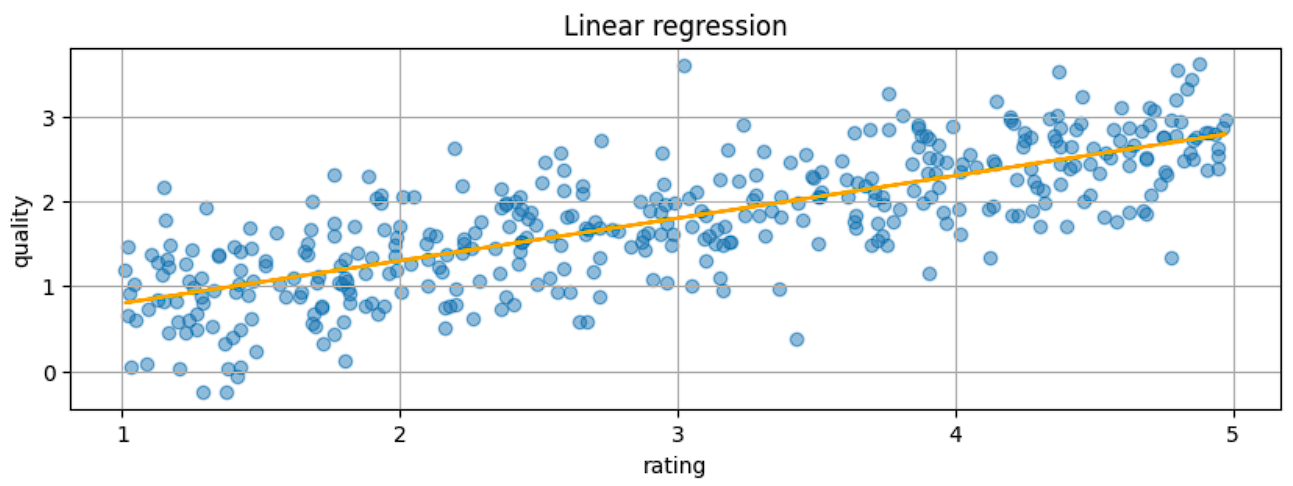

##Примеры:

1. Анкета заёмщика в банке— кредитный лимит.
2. Данные об атомах и структуре молекулы — температура плавления вещества.  
3. Параметры спортсмена и данные о тренировке — количество затраченных организмом калорий.  
4. Характеристики двигателя — выбросы $CO_2$.  
5. Успеваемость в 10 классе — балл ЕГЭ.

##Формализация задачи

Опишем задачу **математически**, ограничимся множеством действительных чисел $\mathbb{R}$. Пусть $m$ — количество рассматриваемых признаков объекта, а $n$ — количество соответствующих им значений:

$$x = (x_1, x_2, ..., x_m) = \{ x_i \}_{i=1}^{m},$$
$$y = (y_1, y_2, ..., y_n) = \{ y_k \}_{k=1}^{n}$$

Тогда для решения задачи регрессии необходимо **найти функцию** $f$, наилучшим образом **приближающую** зависимость $y$ от $x$:  

$$ f: \mathbb{R}^m \rightarrow \mathbb{R}^n $$  

В рамках лекции ограничимся случаем $n = 1$, то есть целевая переменная — одно число.


##Порядок приближения

Решать задачу регрессии, то есть искать функцию $f$, приближающую целевую переменную на основе входных данных, можно разными способами.

Рассмотрим **пример** регрессии — приближение функции $y(x)$ одной независимой переменной $x$ в окрестности заданной точки $x_0$. Для определённости $$y(x) = \sin(x), \quad x \in \left[-\frac{\pi}{2}, \frac{\pi}{2}\right], \quad x_0 = 0$$

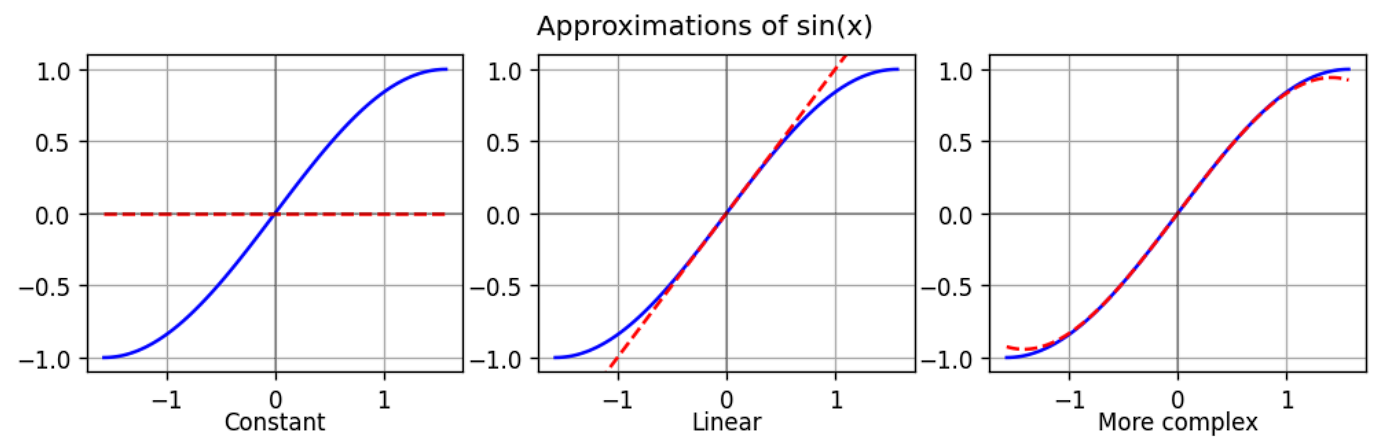

###1. Константное приближение

Простейшим называют приближение константой. Вычислим значение $\sin(x)$ в точке $x_0$. Оно равно нулю. Тогда можно считать, что всюду на исследуемом отрезке функция приближённо равна $0$:

$$f = 0$$

В силу симметрии аналогичный результат мы получили бы, вычисляя константу как среднее значение.

Очевидно, что этот результат плохо описывает исследуемую зависимость, не учитывая изменение значений функции в диапазоне $\left[-1,\ 1\right]$. При обучении реальных моделей машинного обучения часто полезно сравнивать, насколько лучше используемая модель решает задачу лучше, чем простое приближение характерной величиной.


###2. Линейное

Следующим по порядку является **линейное** приближение. Линейное означает, что при изменении $x$ на равные величины $f$ также изменяется на равную величину. В контексте нашего примера это прямая пропорциональность:

$$f(x) = x$$

По графику видно, что такой подход хорошо аппроксимирует целевую переменную $\sin(x)$ на отрезке $\left[-1,\ 1\right]$, начиная отклоняться только ближе к краям. Он отражает монотонность функции и нечётность.

Поэтому линейное приближение можно считать отправной точкой в задачах регрессии.

###3. Нелинейные

Очевидно, что можно получить и более сложные, **нелинейные** по $x$ функции $f$. Введение слагаемого третьей степени даёт график справа:

$$f(x) = x - \frac{x^3}{6}$$

А введение слагаемого пятой степени делает графики $\sin(x)$ и $f(x)$ визуально неразличимыми. Описанный подход с использованием многочленов называют **полиномиальной регрессией**.

Чтобы формально оставаться в рамках линейной модели, использование сложных слагаемых можно рассматривать как введение новых признаков. Например, переобозначим $p\ =\ x^3$. Тогда регрессия снова линейна:

$$f(x, p) = x - \frac{p}{6}$$


##Feature engineering

Очевидно, что не всегда между целевой переменной и фичами в изначально данной нам форме существует связь, для которой линейное приближение стабильно. Простейшим примером будет облако точек, разбросанных около части окружности  в первом квадранте. Проведение прямой не будет корректно отображать истинную нелинейную зависимость:

$$x^2 + y^2 = 1, \quad x \geq 0, \quad y \geq 0$$
$$y(x)\ = \ \sqrt{1-x^2}, \quad x \in \left[0,\ 1\right]$$

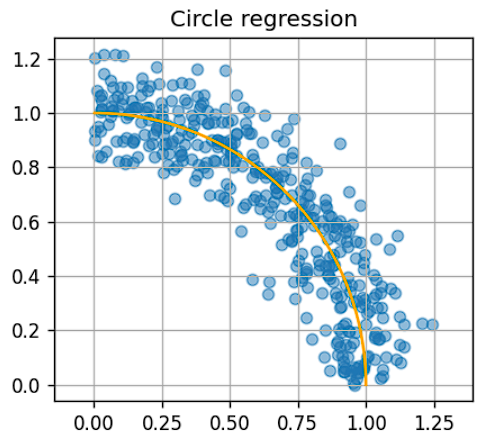

Нам известен набор координат точек $(x,\ y(x))$. Простое переобозначение $p = \sqrt{1-x^2}$ и подгон под известную зависимость не помогут, так как в отдельных точках $x > 1$, получаем корень из отрицательного числа, что в рамках данной задачи нефизично.

В таком случае необходимо возвести $y$ и $x$ в квадрат, чтобы вернуться к линейной связи. Переобозначим:

$$p = x^2,\ \tilde{y}=y^2$$

Задача регрессии сводится к поиску прямой $\tilde{f}(p)$, наилучшим образом отвечающей линейной зависимости $\tilde{y}(p) = 1 - p$.

После обучения модели вернёмся к исходным переменным:

$$x = \sqrt{p},\ f(p) = \sqrt{\tilde{f}(p)}$$

Данная задача затрагивает две концепции, регулярно используемые в анализе данных:

**Линеаризация** — приведение нелинейной зависимости к линейной.

**Feature engineering** — создание новых признаков на основе старых.




##Целевая переменная как сумма признаков

Опыт показывает, что интересующее свойство объекта часто можно представить как сумму его признаков.

###Ускорение и равнодействующая сил

Например, представим **тело массы $m$**, брошенное вертикально вниз с большой скоростью в поле силы тяжести. Будем считать, что оно несёт отрицательный электрический заряд $q$ и испытывает действие постоянного электрического поля $E$. Дополнительно действует сила трения о воздух, пропорциональная квадрату скорости с коэффициентом $\alpha$, то есть $F_{тр}\ =\ \alpha v^2$. Тогда характеристика тела ускорение (таргет) выражается как сумма взаимодействий различной природы: гравитационного, электрического, диссипативного с воздухом (фичи).

$$a = \frac{F_{\text{тяж}} + F_{эл} - F_{\text{тр}}}{m} = g + \frac{|q|E}{m} - \frac{\alpha v^2}{m}$$



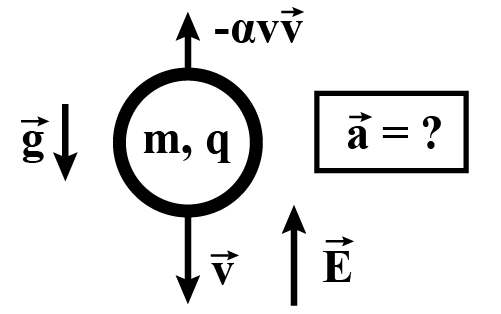

###Конечная температура смеси

В **калориметре**, то есть теплоизолированном сосуде, смешали три части воды, все разной массы $m_i$ и начальной температуры $t_i$. Тогда конечная температура смеси массы $M = m_1 + m_2 + m_3$:

$$t = \frac{m_1 t_1 + m_2 t_2 + m_3 t_3}{M} = w_1 t_1 + w_2 t_2 + w_3 t_3, \quad w_i=\frac{m_i}{M}$$

Отношения масс частей к суммарной массе воды выполняют функцию **весов** $w_i$. Чем больше массы приходится на $i$-ю порцию воды, тем существеннее её вклад, влияние на конечную температуру — целевую переменную.

###Линейная комбинация

Такие суммы встречаются повсеместно и носят название **линейных комбинаций**. По определению это сумма вида:  
$$ w_1x_1 + w_2x_2 + \dots + w_nx_n = \sum_{i=1}^{n} w_ix_i, $$
где $w_i$ — веса, а $x_i$ — признаки.

##Работа с векторами

###1. Одномерный случай

Для двух точек на оси координат $x$ понятие **расстояния** вводится через модуль разности их координат:
$$ d = |x_2 - x_1| $$

Преобразуем как корень из квадрата разности. Тогда в пространстве $\mathbb{R}$ норма вектора:
$$ d = \sqrt{(x_2 - x_1)^2} $$

####Пример

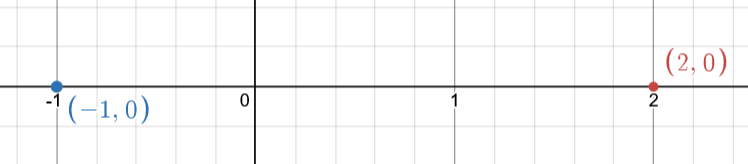

В примере выше длина отрезка равна 3.

###2. Векторы на плоскости

Рассмотрим плоскость $\mathbb{R}^2$ с введённой декартовой прямоугольной системой координат $Oxy$. Для точек на плоскости расстояние находится по теореме Пифагора:
$$ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2} $$

**Скалярное произведение** соответствующих им векторов $\vec{a} = \{x_1, y_1\}$ и $\vec{b} = \{x_2, y_2\}$ выражается как:

$$ \vec{a} \cdot \vec{b} = x_1 x_2 + y_1 y_2 $$

Заметим, что отсюда квадрат длины вектора  $\vec{c} = \{x, y\}$:

$$ c^2 = \vec{c} \cdot \vec{c} = x x + y y = x^2 + y^2 $$

А длина (норма) вектора:

$$ c = |\vec{c}| = \sqrt{x^2 + y^2} $$

**Косинус угла** между векторами можно найти как отношение их скалярного произведения к их длинам:

$$ \cos(\theta) = \frac{\vec{a} \cdot \vec{b}}{|\vec{a}| |\vec{b}|} = \frac{x_1 x_2 + y_1 y_2}{\sqrt{x_1^2 + y_1^2}\sqrt{x_2^2 + y_2^2}}$$

####Пример

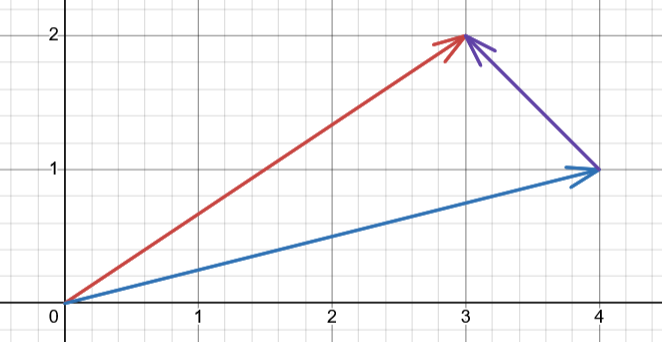

В примере выше даны векторы $\{4, 1\}$ и $\{3,2\}$. Их длины $\sqrt{4^2+1^2}=\sqrt{17}$ и $\sqrt{3^2+2^2}=\sqrt{13}$. Скалярное произведение $4\cdot3+1\cdot2=14$. Косинус угла:

$$ \cos(\theta) = \frac{14}{\sqrt{17} \cdot \sqrt{13}} \approx 0.941 $$

Откуда угол $ \theta \approx 19°$.

###3. Векторы в трёхмерном пространстве

В трёхмерном пространстве $\mathbb{R}^3$ с введённой декартовой прямоугольной системой координат $Oxyz$ расстояние между двумя точками:

$$ d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2 + (z_2 - z_1)^2} $$

Для векторов $\vec{a} = \{x_1, y_1, z_1\}$ и $\vec{b} = \{x_2, y_2, z_2\}$ скалярное произведение выражается как:

$$ \vec{a} \cdot \vec{b} = x_1x_2 + y_1y_2 + z_1z_2 $$

А косинус угла:

$$ \cos(\theta) = \frac{\vec{a} \cdot \vec{b}}{|\vec{a}| |\vec{b}|} = \frac{x_1 x_2 + y_1 y_2 + z_1 z_2}{\sqrt{x_1^2 + y_1^2 + z_1^2}\sqrt{x_2^2 + y_2^2 + z_2^2}}$$

####Пример

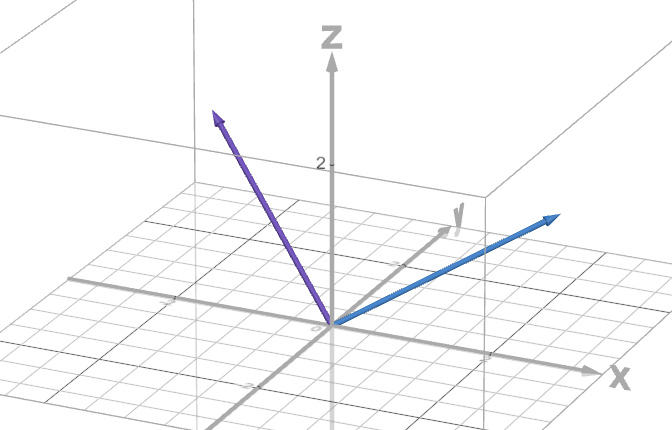

Для векторов $\{-2,1,2\}$ и $\{2,2,1\}$ с картинки самостоятельно посчитайте скалярное произведение. Оно равно нулю, то есть векторы ортогональны.

###4. Произвольная размерность

Видим закономерность. Тогда в пространстве размерности $n$ скалярное произведение $\vec{a} =\{a_1, a_2, ..., a_n\}$ и $\vec{b} = \{b_1, b_2, ..., b_n\}$:

$$ \vec{a} \cdot \vec{b} = a_1 b_1 + a_2 b_2 +\ ... +\ a_n b_n = \sum_{i=1}^n a_i b_i $$

Норма разности векторов $\vec{a}$ и $\vec{b}$:

$$ |\vec{a} - \vec{b}| = \sqrt{(a_1-b_1)^2 + (a_2-b_2)^2 +\ ...\ + (a_n-b_n)^2} = \sqrt{\sum_{i=1}^n(a_i-b_i)^2} $$

Норма вектора $x =(x_1, x_2, ..., x_n) \in \mathbb{R}^n$:

$$ |\vec{x}| = \sqrt{\vec{x}^2} = \sqrt{x_1^2 + x_2^2 +\ ...\ + x_n^2} = \sqrt{\sum_{i=1}^nx_i^2} $$

Косинус угла:

$$ \cos(\theta) = \frac{\vec{a} \cdot \vec{b}}{|\vec{a}| |\vec{b}|} = \frac{\sum_{i=1}^n a_i b_i}{\sqrt{\sum_{i=1}^na_i^2}\sqrt{\sum_{i=1}^nb_i^2}}$$

##Линейная регрессия во введённых обозначениях

В таких обозначениях задачу линейной регрессии можно формализовать. Допустим, у нас есть объект, у которого $n$ признаков:

$$x = (x_1, x_2, ..., x_n)$$

В дальнейшем не будем указывать стрелку над векторами, а от фигурных скобок перейдём к круглым. Этому объекту соответствует известное значение целевой переменной $y_{true}$. Мы пытаемся предсказывать ($predict$) его с помощью некой функции $f(x)$ и получать значение $y_{pred}$.

Эта функция, как выяснили выше, линейна по каждому из признаков, причём можно считать, что предсказываемая величина представима как сумма признаков с учётом их влияния — весов $w=(w_1, w_2,\ ..., w_n)$:

$$y_{pred} = f(x) = w_1x_1 + w_2x_2 + \dots + w_nx_n = \sum_{i=1}^n w_i x_i = wx$$

Такая запись в точности совпадает с линейной комбинацией или скалярным произведением векторов $w$ и $x$.

##Сдвиг

Рассматривая графики, на которых облако точек приближается прямой $y(x)=kx+b$, вы могли заметить, что по оси $y$ существует сдвиг $b$. Его называют **$bias$**. Он не зависит от значений $x$ и играет роль смещения. Не теряя общности, будем считать, что у нас всегда есть признак $x_0$, равный константе $1$, и соответствующий ему вес $w_0$. Тогда под записью $wx$ будем понимать:

$$y_{pred} = f(x) = w_0 + \sum_{i=1}^n w_i x_i = wx$$

##Ошибка предсказания

Искомая функция $f(x)$ должна наилучшим образом приближать известное значение. То есть мы **ищем веса $w$** такие, что ошибка предсказания принимает минимальное значение:

$$ ||y_{true} - y_{pred}|| \rightarrow min $$

В зависимости от задачи используются:

1. **Абсолютная ошибка** ($absolute\ error$):  
$$ |y_{\text{true}} - y_{\text{pred}}| $$
2. **Квадратичная ошибка** ($squared\ error$):  
$$ (y_{\text{true}} - y_{\text{pred}})^2 $$
   
и многие другие.

##Регрессия для множества объектов

Допустим, у нас не один объект, а **множество из $N$ объектов**. Именно такой случай мы рассматривали в примерах выше: облако из 400 точек вблизи полуокружности или точки, в которых рассчитаны истинные значения синуса.

Для каждого $j$-го объекта известен набор признаков $x^j = (x_1^j, x_2^j, ..., x_n^j)$ и значение $y_{true}^j$. Веса $w$ для всех точек одинаковы, это искомые параметры модели. Тогда:

$$y_{pred}^j = f(x^j) = w_1x_1^j + w_2x_2^j + \dots + w_nx_n^j = \sum_{i=1}^n w_i x_i^j = wx^j$$

Ищем минимум ошибки на всём множестве из $N$ элементов:

$$ \sum_{j=1}^N||y_{true}^j - y_{pred}^j|| \rightarrow min $$

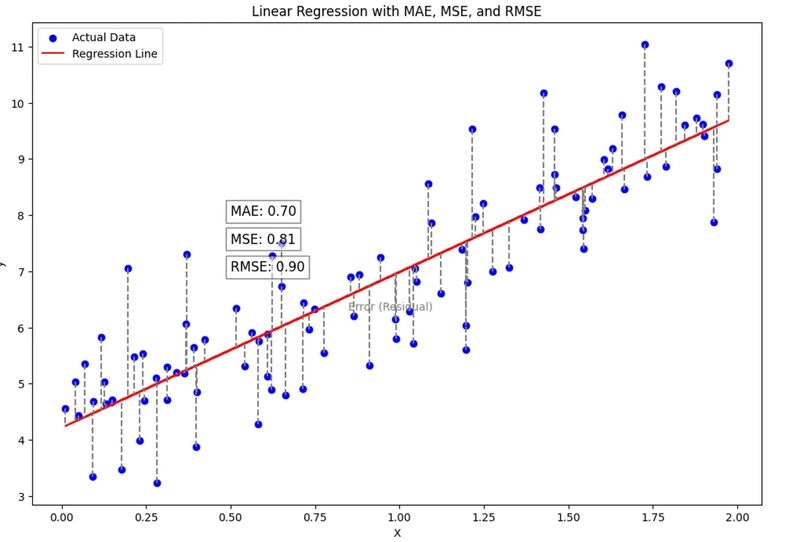

###Примеры ошибок

1. **Средняя абсолютная ошибка**, MAE ($mean\ absolute\ error$):  
$$ MAE = \frac{1}{N} \sum_{j=1}^N|y^j - wx^j| $$
2. **Средняя квадратичная ошибка**, MSE ($mean\ squared\ error$):  
$$ MSE = \frac{1}{N} \sum_{j=1}^N(y^j - wx^j)^2 $$
3. **Корень среднеквадратичной ошибки**, RMSE ($root\ mean\ squared\ error$):  
$$ RMSE = \sqrt{\frac{1}{N} \sum_{j=1}^N(y^j - wx^j)^2} $$


Отдельно упомянем **коэффициент детерминации** $R^2$ ($coefficient\ of\ determination$). Он показывает, насколько лучше или хуже разрабатываемая модель объясняет исходные данные, чем простое приближение средним значением. Если $\bar{y}$ — среднее истинных значений целевой переменной:

$$ \bar{y} = \frac{1}{N} \sum_{j=1}^Ny^j, $$

то коэффициент детерминации:

$$ R^2 = 1 - \frac{\sum_{j=1}^N(y^j - wx^j)^2}{\sum_{j=1}^N(y^j - \bar{y})^2} $$

##Поиск весов

При линейной регрессии части синуса для весов использовалась формула разложения функции в ряд. В реальных задачах вид истинной зависимости часто неизвестен, точная формула в том числе. Существует два основных подхода для поиска $w$.

###1. Аналитическая формула

Веса можно найти в одно действие с помощью аналитической формулы. Однако этот процесс вычислительно сложен и подходит не для всех данных. Вывод и использование формулы требует знания матричного дифференцирования, так что остаётся за рамками данной лекции.

###2. Градиентный спуск

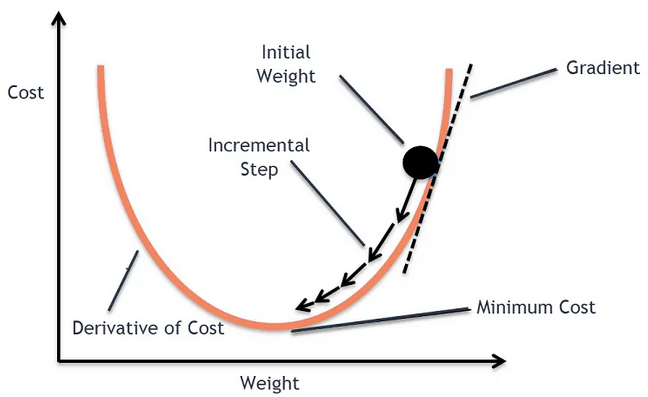

1. Задаём веса $w$ случайными значениями.
2. Делаем предикт $y_{pred}$ с использованием весов.
3. Вычисляем **градиент** функции ошибок. Градиент позволяет определить направление, в котором эта функция убывает. В случае одного признака градиент представляет собой производную. На изображении с помощью производной провели пунктирную линию — касательную к графику. По ней видно, что движение к минимуму соответствует движению влево.
4. Изменяем веса $w$ на небольшую величину с использованием градиента. В примере с картинки смещаемся влево по чёрной стрелочке.
5. Возвращаемся к шагу 2 или прекращаем процесс обучения, если достигнута необходимая точность или достигнуто максимальное число итераций.

## Простая реализация линейной регрессии с градиентным спуском на Python

Импортируем numpy, зафиксируем случайность.

In [26]:
import numpy as np

np.random.seed(42)

Общая структура класса модели машинного обучения:

```python
class LinearRegression:
    def __init__(self, *args, **kwargs):
        ...
    def fit(self, X, Y):
        ..
    def predict(self, X):
        ...
```

При инициализации указываем параметры, которые в процессе обучения для модели останутся неизменными, то есть **гиперпараметры**. Это может быть состояние случайности, скорость обучения, минимальная требуемая точность предсказания, максимальное число итераций и прочие настройки.

**Скорость обучения** ($learning\ rate,\ lr$) — фактор, определяющий величину изменения весов на каждой итерации обучения. Выбирается небольшим числом, по порядку величины часто от $ 10^{-5} $ до $ 10^{-3} $.

На входе также учитываем максимальное число итераций.

```python
class LinearRegression:
    def __init__(self, learning_rate, iterations):
        self.lr = learning_rate
        self.iters = iterations
```

Следующий шаг — **обучение**. Передаём модели известные значения $\{x^j\}_{j=1}^{N}$ и $\{y^j\}_{j=1}^{N}$ всех $N$ точек, эти наборы обозначим как $X$ и $Y$.

Инициализируем веса случайными значениями. Опыт показывает, что простая инициализация нулями даёт худшую сходимость.

По описанному выше алгоритму градиентного спуска в цикле вычисляем $y_{pred}$ с использованием имеющихся весов $w$, считаем градиент и обновляем веса, пока не достигнем заданного числа итераций. Веса изменяются с учётом $lr$, здесь отдельно обрабатываем $bias$.

```python
    def fit(self, X, Y):
        N, n = X.shape
        self.w = np.random.normal(0, 0.2, (n))
        self.b = np.random.normal(0, 0.2, 1)

        for _ in range(self.iters):
            y_pred = np.dot(X, self.w) + self.b
            error = y_pred - Y

            dw = (1 / N) * np.dot(X.T, error)
            db = (1 / N) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self
```

Модель обучена. Теперь её можно использовать для **предсказания** целевой переменной на основе переданных признаков $X$. Вычисляем для каждого $j$-го объекта результат $y_{pred}^j$ и возвращаем набор из всех предсказаний $y_{pred}$:

$$y_{pred}^j = f(x^j) = b + \sum_{i=1}^N w_i x_i^j$$

Реализация метода predict:

```python
    def predict(self, X):
        return np.dot(X, self.w) + self.b
```

Соберём код в одной ячейке и запустим её.

In [77]:
class LinearRegression:
    def __init__(self, learning_rate, iterations):
        self.lr = learning_rate
        self.iters = iterations

    def fit(self, X, Y):
        N, n = X.shape
        self.w = np.random.normal(0, 0.2, (n))
        self.b = np.random.normal(0, 0.2, 1)

        for _ in range(self.iters):
            y_pred = np.dot(X, self.w) + self.b
            error = y_pred - Y

            dw = (1 / N) * np.dot(X.T, error)
            db = (1 / N) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db

        return self

    def predict(self, X):
        return np.dot(X, self.w) + self.b

## Пример решения простой задачи. Предсказание дополнительных расходов клиента по оставленным им отзывам

###Постановка задачи

Допустим, у нас имеются **данные о туристическом маршруте**. Его посетила 1000 человек, каждый в отдельности оценивал по 10-балльной шкале качество работы гида $x_1$ и общее наполнение программы $x_2$.

После основной части маршрута клиенты выбирали дополнительные услуги турагентства на сумму от 1 до десятков тысяч  рублей. Предполагается, что, чем сильнее понравился маршрут туристам, тем охотнее они платили за дополнительные активности.

Необходимо для новых клиентов, только что завершивших основную часть, предсказывать дополнительные расходы.


Синтетический датасет с **отзывами** и расходами:

In [84]:
X = np.random.rand(1000, 2) * 10
Y = 3 * X[:, 0] + 2 * X[:, 1] + 1

Несколько отзывов и значения соответствующих им расходов:

In [85]:
import pandas as pd

pd.DataFrame({
    'guide': X[:, 0],
    'program': X[:, 1],
    'additional costs': Y
}).head(5)

,guide,program,additional costs
0,0.666598,9.985608,22.971011
1,0.248172,8.352441,18.449398
2,3.653668,8.416155,28.793314
3,5.546205,9.016312,35.671239
4,9.261930,0.090982,28.967753


###Решение

Инициализируем линейный регрессор. Задаём $lr\ =\ 10^{-3}$, количество итераций 100 тыс.

In [86]:
model = LinearRegression(learning_rate=0.001, iterations=100000)

Обучим модель на исходных данных $X$ и $Y$.

In [87]:
model.fit(X, Y)
print(model.w, model.b)

[3.00000005 2.00000005] [0.99999944]


Модель приближает зависимость таргета от фич в виде:

$$f(x_1,x_2)=3.00000005x_1+2.00000005x_2+0.99999944$$

Вычислим $y_{pred}$ с помощью обученной модели.

Получим $y_{pred}$.

In [89]:
predictions = model.predict(X)

Оценим результат по метрике $RMSE$. Реализованные эта и прочие метрики имеются в библиотеке **sklearn**, используемой при решении задач классического машинного обучения.

In [90]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(Y, predictions))
print("RMSE:", rmse)

RMSE: 2.0857107526919748e-07


Значения целевой переменной имеют порядок величины единиц и десятков. Ошибка на использованных данных имеет порядок $10^{-7}$, то есть разработанная нами модель хорошо обучилась.

##Пример решения реальной задачи с Kaggle. Предсказание затраченных в ходе тренировки калорий

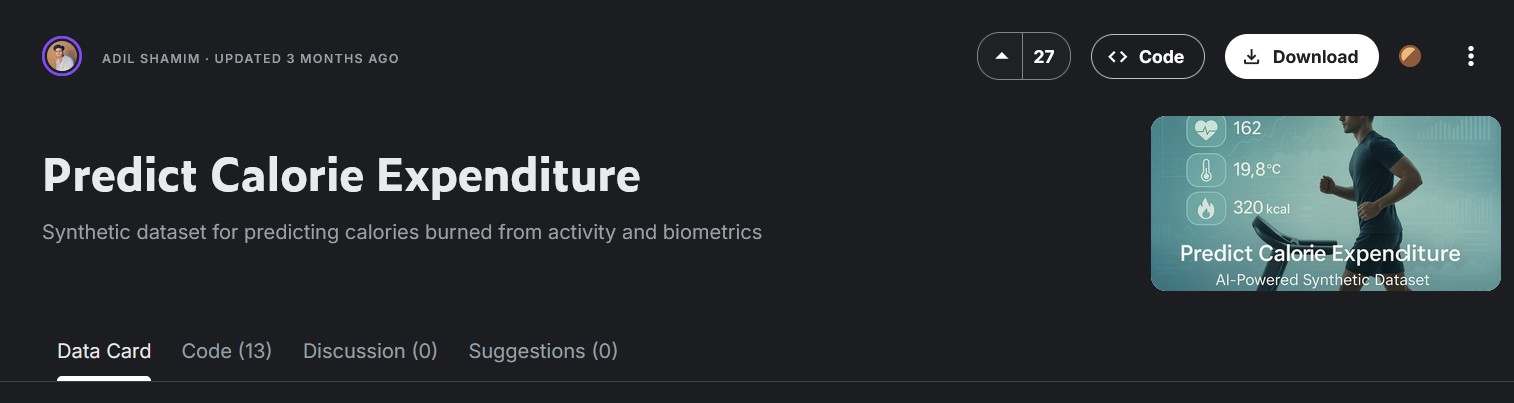

В данной задаче используется синтетический датасет с **Kaggle**. В нём приведены данные о различных спортсменах и количествах калорий, которые они сжигают в ходе тренировок. Количество калорий принимается за целевую переменную, его необходимо предсказывать по остальным признакам.

Для скачивания датасета с Kaggle используем модуль opendatasets.

In [110]:
!pip install -q opendatasets

In [111]:
import opendatasets as od


dataset_url = 'https://www.kaggle.com/datasets/adilshamim8/predict-calorie-expenditure'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alexzyukov
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/adilshamim8/predict-calorie-expenditure


100%|██████████| 12.0M/12.0M [00:00<00:00, 1.09GB/s]

Посмотрим, какие файлы доступны нам для анализа.

In [114]:
import os

os.listdir("./predict-calorie-expenditure")

['train.csv', 'test.csv']

Исследуем данные, то есть проведём **exploratory analysis**. В рамках этой и других лекций будем следовать стандарту CRISP-DM, широко применяемому аналитиками данных.

Импортируем основные библиотеки для анализа данных и зафиксируем случайность.

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

In [124]:
data = pd.read_csv('predict-calorie-expenditure/train.csv')
data.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


Данные о поле следует закодировать как числа 0 и 1. Все остальные признаки представлены как числа и в кодировании не нуждаются.

In [118]:
data.isna().sum()

,0
id,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


В данных нет пропусков.

In [119]:
data.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


Признаки не содержат выбросов, для каждой из колонок значения остаются в порядках величины среднего.

Следующий этап в решении задач науки о данных — **подготовка данных**. Закодируем пол как 0 и 1. Исключим id. Разделим данные на признаки и таргет.

In [162]:
X = data.drop(columns=['Calories', 'id'])
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)
y = data['Calories']

In [163]:
X.corr()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Sex_male
Age,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.009689
Height,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,0.755906
Weight,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.818250
Duration,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,-0.009594
Heart_Rate,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.009122
Body_Temp,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,-0.015933
Sex_male,0.009689,0.755906,0.818250,-0.009594,0.009122,-0.015933,1.000000


Между ростом и весом высокая корреляция, то есть сильная линейная связь. Такие признаки снижают эффективность моделей линейной регрессии. Исключим один любой из этой пары.

In [153]:
X = X.drop(columns=['Height'])

Важным подходом является разбиение данных на train / valid / test.

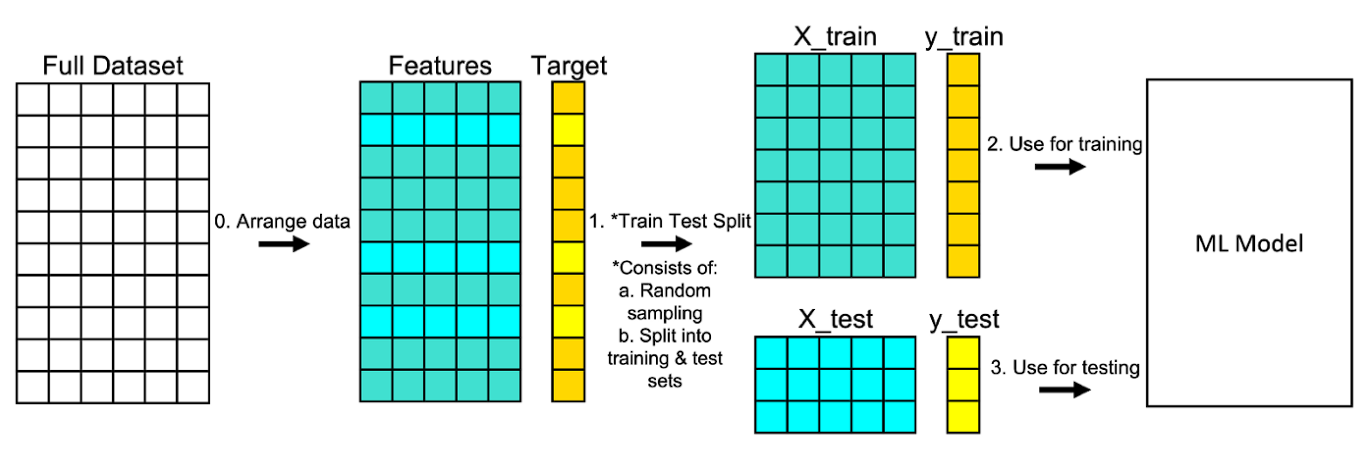

**train** — данные, которые используются при поиске весов модели. Это основная часть данных, на которой происходит обучение.

**valid** — данные, используемые для валидации модели во время обучения. Они помогают исключить случай, когда модель подгоняет зависимость под известные тренировочные данные, плохо обобщая остальные.

**test** — данные, которые используются для окончательной оценки  качества работы модели после её обучения. Аналогично тому, как если бы у нас извне появились новые данные, к которым нужно применить модель.

Этот подход применяют, только если данных много и размеров train достаточно для обучения. Традиционно для разбиения используют соотношение 80 / 10 / 10. Функционал разбиения данных на две выборки реализован в библиотеке sklearn.

In [164]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

В рамках этой задачи ограничимся разбиением на две подвыборки. В таком случае принято делить в отношении 80 / 20.

**Стандартизируем** данные. Это преобразование приводит признаки к одинаковому разбросу: среднее значение равно $0$, отклонение от среднего равно $1$. То есть признаки становятся сопоставимы, интерпретируемы.

In [165]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Следующий этап решения задачи — **моделирование**, то есть обучение. Используем готовую реализацию модели линейной регрессии из библиотеки sklearn. Она соответствует описанной выше структуре: имеет методы fit() и predict().

In [167]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

print('Coeff:', model.coef_)
print('Bias:', model.intercept_)

Coeff: [  8.07890174  -1.8817437    3.77374955  56.48217341  18.44445832
 -14.19354663  -0.84400203]
Bias: 88.29846499999981


Сделаем предсказание.

In [168]:
y_pred = model.predict(X_test_scaled)

Оценим результат на тестовой выборке с использованием метрик из sklearn.

RMSE: 11.06
R2 Score: 0.97


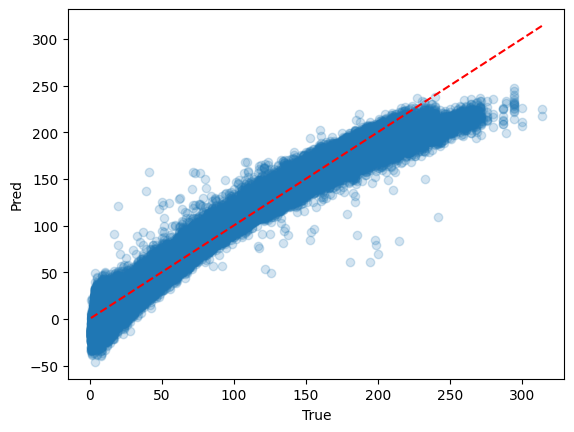

In [176]:
from sklearn.metrics import mean_squared_error, r2_score


rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

plt.scatter(y_test, y_pred, alpha=0.2)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('True')
plt.ylabel('Pred')
plt.show()

Коэффициент детерминации близок к 1, то есть модель обучилась хорошо. Целевая переменная по порядку величины составляет сотни, ошибка модели имеет порядок десятков.

Построенный график показывает, как соотносятся предсказанные и истинные значения. В идеальном случае это красная пунктирная прямая, то есть $y_{pred}=y_{true}$.

Видно, что модель хуже справляется с данными, когда значения таргета выше 250. Требуется более сложный регрессор или обучение двух линейных моделей: одной для $y < 250$, а другой при $y > 250$ .

## Недостатки линейной регрессии

###1. Требование линейной связи

Как выяснили выше, связь между таргетом и фичами часто нелинейная и требует дополнительного преобразования. Когда количество признаков идёт на десятки, мы не можем обрабатывать каждый из параметров вручную, поэтому нужно использовать другой регрессор.

###2. Чувствительность к выбросам

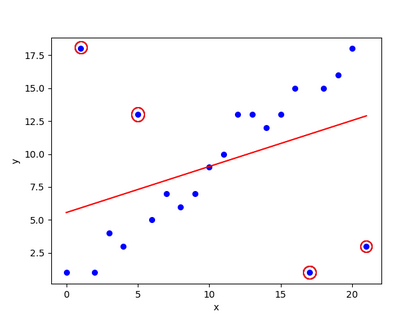

Даже конечное их количество может значительно сместить веса. Поэтому на этапе предобработки данных следует удалять выбросы из выборки. В приведённой иллюстрации 4 выброса явным образом исказили работу модели.

###3. Независимость признаков

Если между признаками существует линейная связь, модель будет вести себя нестабильно. Для решения этой проблемы применяют **регуляризацию**. Вместо того чтобы минимизировать только ошибку предсказания, мы вводим дополнительное слагаемое, равное норме вектора весов $w$, умноженной на некоторое число $\lambda>0$, являющееся ещё одним гиперпараметром модели:


$$ \sum_{j=1}^N||y_{true}^j - y_{pred}^j|| + \lambda\sum_{i=1}^n||w_i||\rightarrow min $$

##Дополнительная задача. Определение скорости жидкости в глубоком водоёме

###Постановка задачи

В море глубиной 1 км для различных глубин погружения $h$ исследовались гидростатическое давление $P$ и квадрат скорости жидкости $v^2$. С помощью датчиков снято 100 последовательных значений, то есть глубина погружения изменялась от поверхности воды до самого дна с шагом в 10 м.

Данная задача хорошо описывается теоретически уравнением Бернулли:

$$P + \frac{1}{2} \rho v^2 + \rho g h = const$$

Необходимо обучить модель линейной регрессии, для произвольной глубины и измеренного на ней гидростатического давления предсказывающей величину квадрата скорости потока воды.

In [187]:
import numpy as np

np.random.seed(42)
n_samples = 100

P = np.linspace(100000, 1000000, n_samples)
h = np.linspace(0, 1000, n_samples)
rho = 1030
g = 9.81
const = 400000
v_square = (2 * (P + rho * g * h - const)) / rho * (1 + np.random.normal(0, 0.1, n_samples))

###Решение

Аналогично примерам выше решим поставленную задачу.

Coefficients: [2.37207394e-02 2.63563771e-05]
Bias: -3045.620413789544
RMSE: 774.03
R2 Score: 0.98


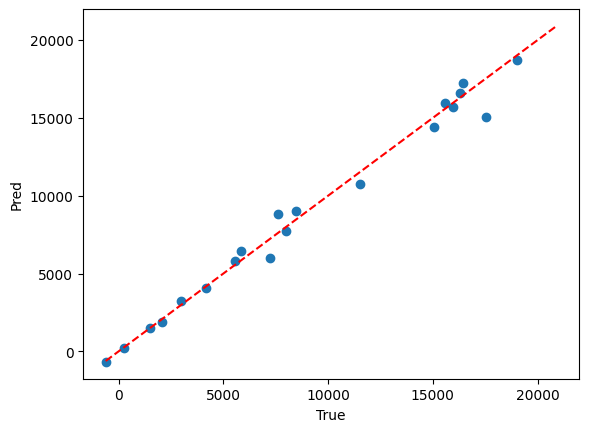

In [188]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


data = pd.DataFrame({'P': P, 'h': h, 'v^2': v_square})

X = data[['P', 'h']]
y = data['v^2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f'Coefficients: {model.coef_}')
print(f'Bias: {model.intercept_}')

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R2 Score: {r2:.2f}')

plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('True')
plt.ylabel('Pred')
plt.show()



$RMSE$ на тестовых данных даёт 774, тогда как порядок величины таргета — десятки тысяч. Коэффициент детерминации $R^2=0.98$, то есть модель обучилась отлично.

#Выводы

В ходе данного занятия мы:

1. Ознакомились с основными случаями применения линейной регрессии.
2. Математически формализовали задачу.
3. Рассмотрели различные приближения и подход feature engineering.
4. Научились работать с векторами произвольной размерности.
5. Познакомились с различными ошибками, применяемыми для оценки работы моделей машинного обучения.
6. Изучили метод градиентного спуска для поиска весов.
7. Реализовали простой линейный регрессор с нуля.
8. Решили задачу регрессии с двумя признаками.
9. Решили практическую задачу с Kaggle в рамках стандарта CRISP-DM.
10. Рассмотрели недостатки линейной регрессии и подходы к их устранению.

Лекция сопровождается дополнительной задачей.

##Данные об авторе

Зюков Алексей Алексеевич,

лаборант отдела-онлайн образования НИЯУ МИФИ,

бакалавр кафедры суперкомпьютерных технологий в инженерно-физическом моделировании НИЯУ МИФИ.

##Список использованной и рекомендованной литературы

1. Егоров, А. Д. Репозитории с лекциями по анализу данных в НИЯУ МИФИ. – Текст : электронный / А. Д. Егоров // GitHub : [сайт]. – URL: https://github.com/ShadarRim (дата обращения: 01.11.2025).
2. Малов, Д. А. Глубокое обучение и анализ данных : практическое руководство. / Д. А. Малов. – Текст : непосредственный. – Санкт-Петербург : БХВ-Петербург, 2023. – 272 с. : ил. – ISBN 978-5-9775-1172-8.
3. Синицин, Ф. Линейные модели. – Текст : электронный / Ф. Синицин, Е. Соколов ; Яндекс.Образование. – URL: https://education.yandex.ru/handbook/ml/article/linear-models (дата обращения: 01.11.2025).

#Приложения. Код для построения иллюстраций

##Предсказание качества по отзывам

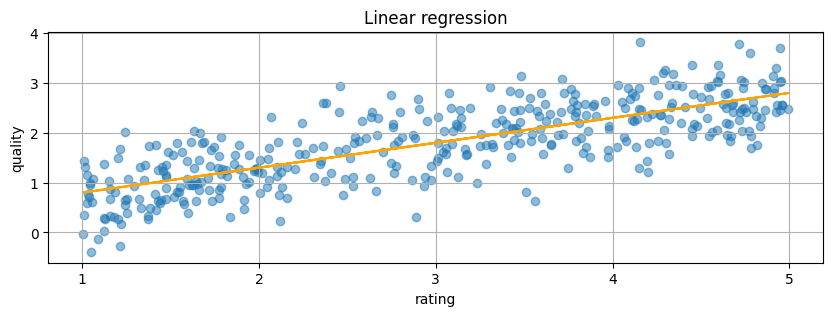

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


N_points = 400
x = np.random.uniform(1, 5, N_points)
y_true = 0.5 * x + 0.3
y_noisy = y_true + np.random.normal(0, 0.5, N_points)

figure, axes = plt.subplots(figsize=(10, 3), dpi=100)
plt.scatter(x, y_noisy, alpha=0.5)
plt.plot(x, y_true, ls='-', marker='', c='orange')
axes.xaxis.set_ticks([1, 2, 3, 4, 5])
axes.set_ylabel('quality')
axes.set_xlabel('rating')
axes.set_title('Linear regression')
plt.grid()
plt.show()


##Аппроксимация синуса несколькими методами

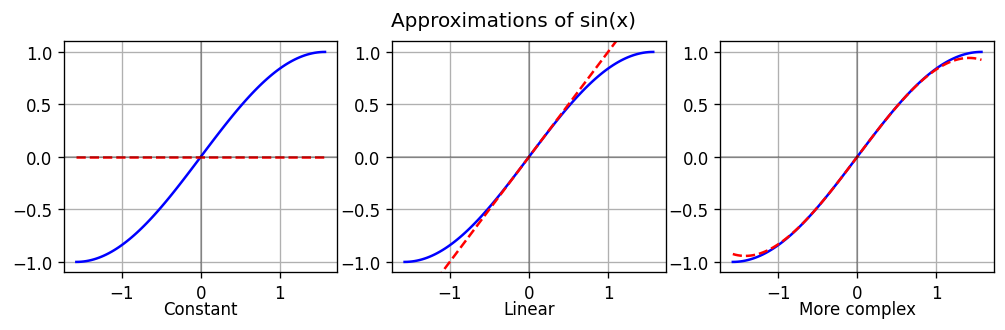

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-np.pi / 2, np.pi / 2, 100)
y = np.sin(x)
f_x0 = 0

linear_approx = f_x0 + x
cubic_approx = linear_approx - 1 / 6 * x ** 3

figure, axes = plt.subplots(1, 3, figsize=(10, 2.5), dpi=120)
approximations = [f_x0 * np.ones_like(x), linear_approx, cubic_approx]
titles = ['Constant', 'Linear', 'More complex']

for ax, approx, title in zip(axes, approximations, titles):
    ax.plot(x, y, color='blue')
    ax.plot(x, approx, linestyle='--', color='red')
    ax.grid(True)
    ax.set_ylim(-1.1, 1.1)
    ax.set_yticks([-1, -0.5, 0, 0.5, 1])

    ax.axhline(0, color='black', linewidth=1, alpha=0.3)
    ax.axvline(0, color='black', linewidth=1, alpha=0.3)

    ax.text(0.5, -0.18, title, fontsize=10, ha='center', transform=ax.transAxes)

figure.suptitle('Approximations of sin(x)', fontsize=12)
plt.show()

##Регрессия с нелинейным преобразованием для окружности

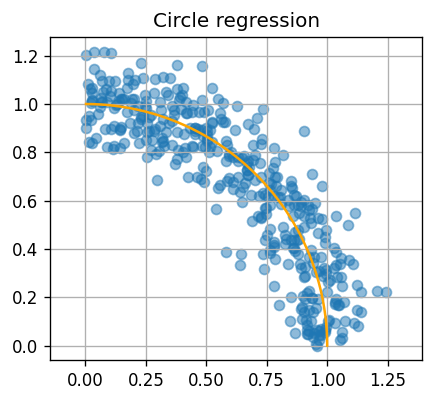

In [10]:
import matplotlib.pyplot as plt
import numpy as np

N_points = 400
r = 1
phi = np.random.uniform(0, np.pi / 2, N_points)
phi = np.sort(phi)
x = r * np.cos(phi)
y = r * np.sin(np.acos(x / r))

noise = np.random.normal(0, 0.1, N_points)
r_noisy = r + noise
x_noisy = r_noisy * np.cos(phi)
y_noisy = r_noisy * np.sin(np.acos(x_noisy / r_noisy))

figure, axes = plt.subplots(figsize=(4, 3.5), dpi=120)
plt.scatter(x_noisy, y_noisy, alpha=0.5)
plt.plot(x, y, ls='-', marker='', c='orange')
axes.set_title('Circle regression')
plt.grid()
plt.axis('equal')
plt.show()
